In [5]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc90/BHOSS_CODE"
data = "Rh40_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_360.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9495.093347 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 4.03342e-64 0.00141282
Total flux = 2.115237 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.973143 Rg/c, inclination: 70.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 8.89303e-16 0.00136536
Total flux = 2.116031 Jy at 230 GHz
135:26:46.287 - Start Program


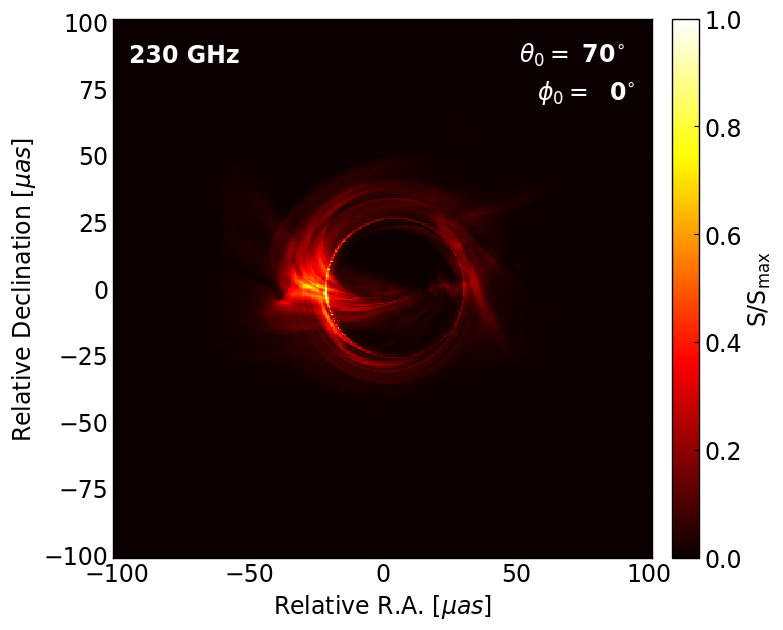

In [13]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 10, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc10/BHOSS_CODE
311, flux: 2.510597 at 9003.597816
312, flux: 2.498946 at 9013.664967
313, flux: 2.505420 at 9023.730951
314, flux: 2.501063 at 9033.794470
315, flux: 2.489609 at 9043.862656
316, flux: 2.417523 at 9053.929463
317, flux: 2.334590 at 9063.995875
318, flux: 2.275635 at 9074.060236
319, flux: 2.248665 at 9084.125014
320, flux: 2.260065 at 9094.191161
321, flux: 2.340142 at 9104.258463
322, flux: 2.345483 at 9114.324296
323, flux: 2.370142 at 9124.388087
324, flux: 2.370672 at 9134.450798
325, flux: 2.338690 at 9144.515488
326, flux: 2.347716 at 9154.580838
327, flux: 2.330239 at 9164.643343
328, flux: 2.267787 at 9174.708090
329, flux: 2.198375 at 9184.774596
330, flux: 2.159985 at 9194.841238
331, flux: 2.129107 at 9204.906551
332, flux: 2.098224 at 9214.968879
333, flux: 2.048088 at 9225.032659
334, flux: 2.039220 at 9235.096933
335, flux: 2.038719 at 9243.486122
336, flux: 1.958704 at 9253.551623
337, 

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.987506 Jy, the density scale = 1.850000e-18


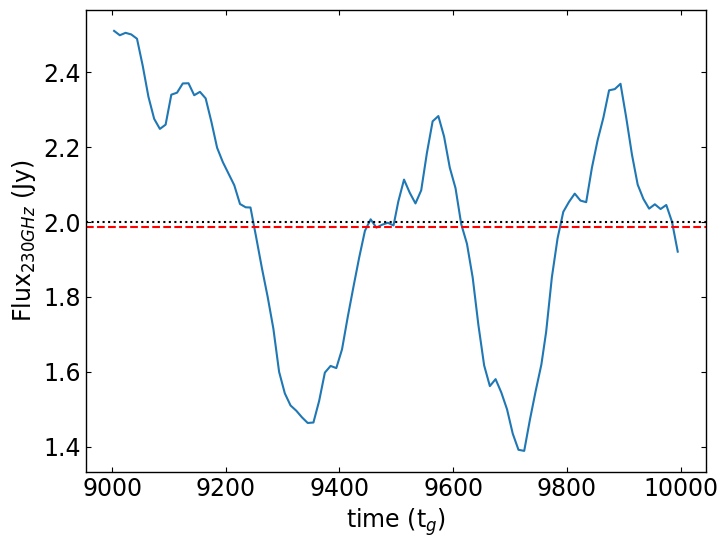

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.510597 Jy at 9003.597816
312:: 2.498946 Jy at 9013.664967
313:: 2.505420 Jy at 9023.730951
314:: 2.501063 Jy at 9033.794470
315:: 2.489609 Jy at 9043.862656
316:: 2.417523 Jy at 9053.929463
317:: 2.334590 Jy at 9063.995875
318:: 2.275635 Jy at 9074.060236
319:: 2.248665 Jy at 9084.125014
320:: 2.260065 Jy at 9094.191161
321:: 2.340142 Jy at 9104.258463
322:: 2.345483 Jy at 9114.324296
323:: 2.370142 Jy at 9124.388087
324:: 2.370672 Jy at 9134.450798
325:: 2.338690 Jy at 9144.515488
326:: 2.347716 Jy at 9154.580838
327:: 2.330239 Jy at 9164.643343
328:: 2.267787 Jy at 9174.708090
329:: 2.198375 Jy at 9184.774596
330:: 2.159985 Jy at 9194.841238
331:: 2.129107 Jy at 9204.906551
332:: 2.098224 Jy at 9214.968879
333:: 2.048088 Jy at 9225.032659
334:: 2.039220 Jy at 9235.096933
335:: 2.038719 Jy at 9243.486122
336:: 1.958704 Jy at 9253.551623
337:: 1.876432 Jy at 9263.615142
338:: 1.800169 Jy at 9273.678488
339:: 1.714991 Jy at 9283.741347
340:: 1.599722 Jy at 9293.805262
341:: 1.54

In [7]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 30, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc30/BHOSS_CODE
311, flux: 2.375575 at 9003.597816
312, flux: 2.359240 at 9013.664967
313, flux: 2.352866 at 9023.730951
314, flux: 2.322176 at 9033.794470
315, flux: 2.283482 at 9043.862656
316, flux: 2.192516 at 9053.929463
317, flux: 2.086623 at 9063.995875
318, flux: 2.029538 at 9074.060236
319, flux: 2.000472 at 9084.125014
320, flux: 2.029199 at 9094.191161
321, flux: 2.107554 at 9104.258463
322, flux: 2.114865 at 9114.324296
323, flux: 2.164625 at 9124.388087
324, flux: 2.187262 at 9134.450798
325, flux: 2.174288 at 9144.515488
326, flux: 2.207784 at 9154.580838
327, flux: 2.209296 at 9164.643343
328, flux: 2.164224 at 9174.708090
329, flux: 2.113939 at 9184.774596
330, flux: 2.084390 at 9194.841238
331, flux: 2.061316 at 9204.906551
332, flux: 2.037390 at 9214.968879
333, flux: 2.002026 at 9225.032659
334, flux: 2.018038 at 9235.096933
335, flux: 2.038242 at 9243.486122
336, flux: 1.968641 at 9253.551623
337, 

In [8]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [9]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.956739 Jy, the density scale = 1.800000e-18


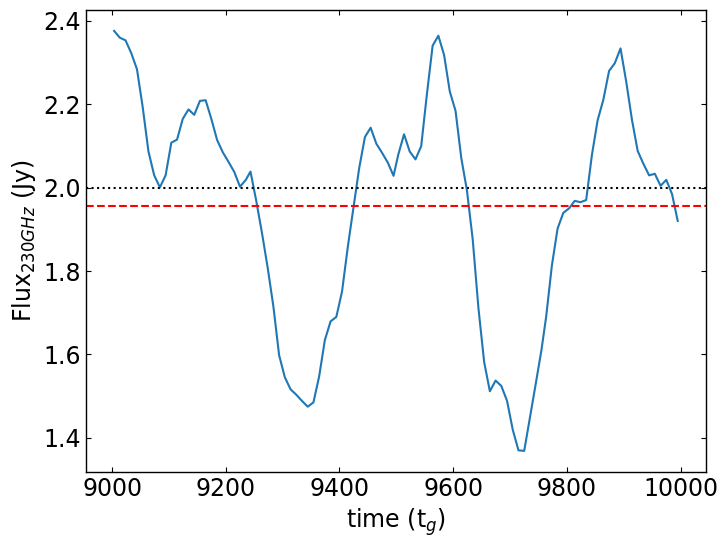

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [11]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.375575 Jy at 9003.597816
312:: 2.359240 Jy at 9013.664967
313:: 2.352866 Jy at 9023.730951
314:: 2.322176 Jy at 9033.794470
315:: 2.283482 Jy at 9043.862656
316:: 2.192516 Jy at 9053.929463
317:: 2.086623 Jy at 9063.995875
318:: 2.029538 Jy at 9074.060236
319:: 2.000472 Jy at 9084.125014
320:: 2.029199 Jy at 9094.191161
321:: 2.107554 Jy at 9104.258463
322:: 2.114865 Jy at 9114.324296
323:: 2.164625 Jy at 9124.388087
324:: 2.187262 Jy at 9134.450798
325:: 2.174288 Jy at 9144.515488
326:: 2.207784 Jy at 9154.580838
327:: 2.209296 Jy at 9164.643343
328:: 2.164224 Jy at 9174.708090
329:: 2.113939 Jy at 9184.774596
330:: 2.084390 Jy at 9194.841238
331:: 2.061316 Jy at 9204.906551
332:: 2.037390 Jy at 9214.968879
333:: 2.002026 Jy at 9225.032659
334:: 2.018038 Jy at 9235.096933
335:: 2.038242 Jy at 9243.486122
336:: 1.968641 Jy at 9253.551623
337:: 1.891673 Jy at 9263.615142
338:: 1.808270 Jy at 9273.678488
339:: 1.715159 Jy at 9283.741347
340:: 1.598242 Jy at 9293.805262
341:: 1.54

In [12]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 50, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc50/BHOSS_CODE
311, flux: 2.275243 at 9003.597816
312, flux: 2.270618 at 9013.664967
313, flux: 2.267104 at 9023.730951
314, flux: 2.232030 at 9033.794470
315, flux: 2.161060 at 9043.862656
316, flux: 2.051683 at 9053.929463
317, flux: 1.928847 at 9063.995875
318, flux: 1.876951 at 9074.060236
319, flux: 1.862132 at 9084.125014
320, flux: 1.918675 at 9094.191161
321, flux: 2.000073 at 9104.258463
322, flux: 2.014454 at 9114.324296
323, flux: 2.092401 at 9124.388087
324, flux: 2.134532 at 9134.450798
325, flux: 2.124756 at 9144.515488
326, flux: 2.154484 at 9154.580838
327, flux: 2.164903 at 9164.643343
328, flux: 2.139414 at 9174.708090
329, flux: 2.091728 at 9184.774596
330, flux: 2.069835 at 9194.841238
331, flux: 2.050952 at 9204.906551
332, flux: 2.025507 at 9214.968879
333, flux: 1.993785 at 9225.032659
334, flux: 2.030281 at 9235.096933
335, flux: 2.077625 at 9243.486122
336, flux: 2.004385 at 9253.551623
337, 

In [13]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [14]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.967736 Jy, the density scale = 1.720000e-18


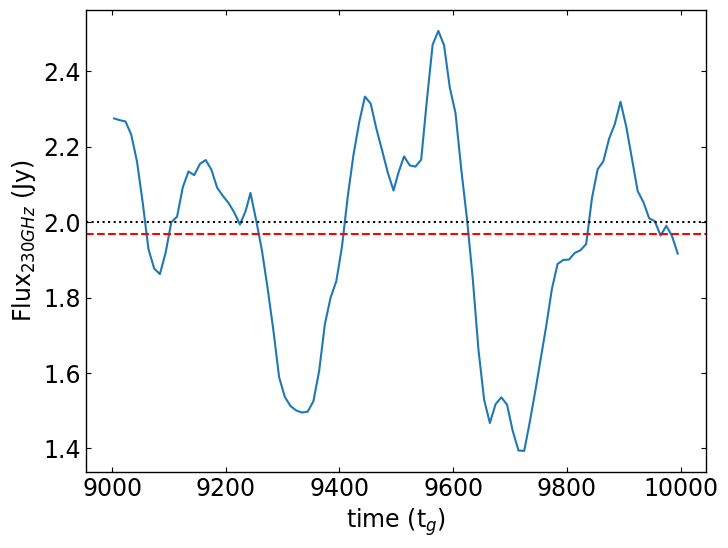

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [16]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.275243 Jy at 9003.597816
312:: 2.270618 Jy at 9013.664967
313:: 2.267104 Jy at 9023.730951
314:: 2.232030 Jy at 9033.794470
315:: 2.161060 Jy at 9043.862656
316:: 2.051683 Jy at 9053.929463
317:: 1.928847 Jy at 9063.995875
318:: 1.876951 Jy at 9074.060236
319:: 1.862132 Jy at 9084.125014
320:: 1.918675 Jy at 9094.191161
321:: 2.000073 Jy at 9104.258463
322:: 2.014454 Jy at 9114.324296
323:: 2.092401 Jy at 9124.388087
324:: 2.134532 Jy at 9134.450798
325:: 2.124756 Jy at 9144.515488
326:: 2.154484 Jy at 9154.580838
327:: 2.164903 Jy at 9164.643343
328:: 2.139414 Jy at 9174.708090
329:: 2.091728 Jy at 9184.774596
330:: 2.069835 Jy at 9194.841238
331:: 2.050952 Jy at 9204.906551
332:: 2.025507 Jy at 9214.968879
333:: 1.993785 Jy at 9225.032659
334:: 2.030281 Jy at 9235.096933
335:: 2.077625 Jy at 9243.486122
336:: 2.004385 Jy at 9253.551623
337:: 1.925068 Jy at 9263.615142
338:: 1.824214 Jy at 9273.678488
339:: 1.713100 Jy at 9283.741347
340:: 1.588827 Jy at 9293.805262
341:: 1.53

In [17]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 70, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc70/BHOSS_CODE
311, flux: 2.156677 at 9003.597816
312, flux: 2.176452 at 9013.664967
313, flux: 2.162977 at 9023.730951
314, flux: 2.128549 at 9033.794470
315, flux: 2.050002 at 9043.862656
316, flux: 1.924465 at 9053.929463
317, flux: 1.788026 at 9063.995875
318, flux: 1.746486 at 9074.060236
319, flux: 1.749952 at 9084.125014
320, flux: 1.851094 at 9094.191161
321, flux: 1.981491 at 9104.258463
322, flux: 2.009366 at 9114.324296
323, flux: 2.122000 at 9124.388087
324, flux: 2.220389 at 9134.450798
325, flux: 2.176780 at 9144.515488
326, flux: 2.141961 at 9154.580838
327, flux: 2.160066 at 9164.643343
328, flux: 2.139542 at 9174.708090
329, flux: 2.092088 at 9184.774596
330, flux: 2.096066 at 9194.841238
331, flux: 2.074363 at 9204.906551
332, flux: 2.008129 at 9214.968879
333, flux: 1.944343 at 9225.032659
334, flux: 1.998027 at 9235.096933
335, flux: 2.042288 at 9243.486122
336, flux: 1.948911 at 9253.551623
337, 

In [18]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [19]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.944185 Jy, the density scale = 1.570000e-18


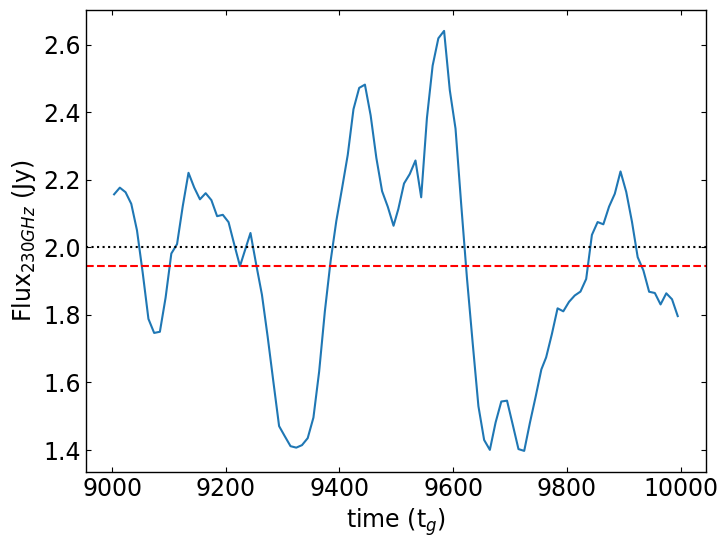

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [21]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.156677 Jy at 9003.597816
312:: 2.176452 Jy at 9013.664967
313:: 2.162977 Jy at 9023.730951
314:: 2.128549 Jy at 9033.794470
315:: 2.050002 Jy at 9043.862656
316:: 1.924465 Jy at 9053.929463
317:: 1.788026 Jy at 9063.995875
318:: 1.746486 Jy at 9074.060236
319:: 1.749952 Jy at 9084.125014
320:: 1.851094 Jy at 9094.191161
321:: 1.981491 Jy at 9104.258463
322:: 2.009366 Jy at 9114.324296
323:: 2.122000 Jy at 9124.388087
324:: 2.220389 Jy at 9134.450798
325:: 2.176780 Jy at 9144.515488
326:: 2.141961 Jy at 9154.580838
327:: 2.160066 Jy at 9164.643343
328:: 2.139542 Jy at 9174.708090
329:: 2.092088 Jy at 9184.774596
330:: 2.096066 Jy at 9194.841238
331:: 2.074363 Jy at 9204.906551
332:: 2.008129 Jy at 9214.968879
333:: 1.944343 Jy at 9225.032659
334:: 1.998027 Jy at 9235.096933
335:: 2.042288 Jy at 9243.486122
336:: 1.948911 Jy at 9253.551623
337:: 1.859749 Jy at 9263.615142
338:: 1.735580 Jy at 9273.678488
339:: 1.602139 Jy at 9283.741347
340:: 1.470756 Jy at 9293.805262
341:: 1.44

In [22]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 90, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc90/BHOSS_CODE
311, flux: 2.177138 at 9003.597816
312, flux: 2.219214 at 9013.664967
313, flux: 2.256428 at 9023.730951
314, flux: 2.252404 at 9033.794470
315, flux: 2.174471 at 9043.862656
316, flux: 1.971194 at 9053.929463
317, flux: 1.732302 at 9063.995875
318, flux: 1.684344 at 9074.060236
319, flux: 1.736988 at 9084.125014
320, flux: 1.875381 at 9094.191161
321, flux: 2.063032 at 9104.258463
322, flux: 2.084782 at 9114.324296
323, flux: 2.190385 at 9124.388087
324, flux: 2.315371 at 9134.450798
325, flux: 2.357163 at 9144.515488
326, flux: 2.347371 at 9154.580838
327, flux: 2.305904 at 9164.643343
328, flux: 2.299754 at 9174.708090
329, flux: 2.204331 at 9184.774596
330, flux: 2.150438 at 9194.841238
331, flux: 2.163897 at 9204.906551
332, flux: 2.144928 at 9214.968879
333, flux: 2.036564 at 9225.032659
334, flux: 2.079338 at 9235.096933
335, flux: 2.133745 at 9243.486122
336, flux: 2.091858 at 9253.551623
337, 

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.017037 Jy, the density scale = 1.550000e-18


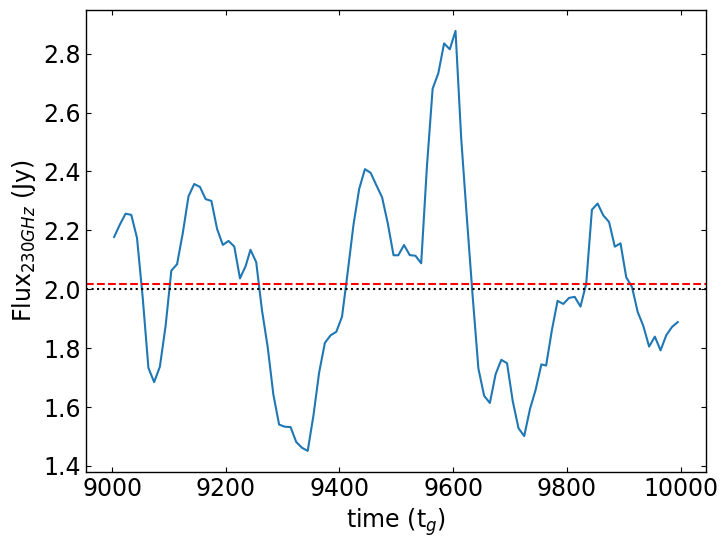

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.177138 Jy at 9003.597816
312:: 2.219214 Jy at 9013.664967
313:: 2.256428 Jy at 9023.730951
314:: 2.252404 Jy at 9033.794470
315:: 2.174471 Jy at 9043.862656
316:: 1.971194 Jy at 9053.929463
317:: 1.732302 Jy at 9063.995875
318:: 1.684344 Jy at 9074.060236
319:: 1.736988 Jy at 9084.125014
320:: 1.875381 Jy at 9094.191161
321:: 2.063032 Jy at 9104.258463
322:: 2.084782 Jy at 9114.324296
323:: 2.190385 Jy at 9124.388087
324:: 2.315371 Jy at 9134.450798
325:: 2.357163 Jy at 9144.515488
326:: 2.347371 Jy at 9154.580838
327:: 2.305904 Jy at 9164.643343
328:: 2.299754 Jy at 9174.708090
329:: 2.204331 Jy at 9184.774596
330:: 2.150438 Jy at 9194.841238
331:: 2.163897 Jy at 9204.906551
332:: 2.144928 Jy at 9214.968879
333:: 2.036564 Jy at 9225.032659
334:: 2.079338 Jy at 9235.096933
335:: 2.133745 Jy at 9243.486122
336:: 2.091858 Jy at 9253.551623
337:: 1.929507 Jy at 9263.615142
338:: 1.804534 Jy at 9273.678488
339:: 1.642123 Jy at 9283.741347
340:: 1.540178 Jy at 9293.805262
341:: 1.53